<a href="https://colab.research.google.com/github/chipojaya1/pro_bono_dd/blob/main/Efficiency_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consulting360 Pro Bono Project -
### Team Capacity vs. Revenue Efficiency Report

## Analysis Framework:
1. **Capacity & Utilization Analysis**
2. **Revenue per Employee Metrics**
3. **Growth Trends Analysis**
4. **Employee Engagement Analysis**



##**Setting up Environment and Loading the Data**

In [1]:
# Read data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load libraries for simple data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')  # Set visual style for seaborn images

import warnings
warnings.simplefilter("ignore")

In [5]:
# Load the data
file_path = '/content/drive/MyDrive/DDev/Revenue_DData.xlsx'

In [16]:
# Creating dataframes
all = pd.read_excel(file_path, sheet_name='Data')
financial = pd.read_excel(file_path, sheet_name='Core Financial Metrics')
team = pd.read_excel(file_path, sheet_name='Team Capacity Metrics')
projects = pd.read_excel(file_path, sheet_name='Project or Retainer Perfomance')
hiring = pd.read_excel(file_path, sheet_name='Hiring Attrition Metrics')

##**Data exploration**


**Reasoning**:
Explore the data by examining its shape, data types, key variables, missing values, and summary statistics.



In [20]:
all.info()
print('\n')
all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                6 non-null      int64  
 1   Retainer Income in $                6 non-null      int64  
 2   Project Income                      6 non-null      int64  
 3   Retainer MRR Actual                 6 non-null      float64
 4   Project MRR Actual                  6 non-null      float64
 5   Total Annual Income                 6 non-null      int64  
 6   Total Annual Expenses               6 non-null      int64  
 7   Net Income                          6 non-null      int64  
 8   Profit Margin %                     6 non-null      float64
 9   Avg Cost per Logged Hour            3 non-null      float64
 10  Total Logged Hours                  3 non-null      float64
 11  Total Logged Billable Hours         3 non-null   

,Year,Retainer Income in $,Project Income,Retainer MRR Actual,Project MRR Actual,Total Annual Income,Total Annual Expenses,Net Income,Profit Margin %,Avg Cost per Logged Hour,...,# Active Retainers @ Year End,Avg Retainer Renewal Upsell,Retainer Renewal Rate,# Retainers Landed,# Retainers Lost,Net Retainer Growth,Avg MRR for Newly Landed Retainers,Retainer MRR @ Year End,Project MRR Contracted @ Year End,Avg Cost per Logged Billable Hour
0,2019,1382595,553157,115216.250000,46096.416667,1935752,2303522,26658,0.013771,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1385650,474977,115470.833333,39581.416667,1860627,1988816,21961,0.011803,NaN,...,20.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1869050,967379,155754.166667,80614.916667,2836429,2902613,162556,0.057310,NaN,...,23.0,NaN,1.00,NaN,NaN,NaN,NaN,165000.0,77000.0,NaN
3,2022,2420320,811305,201693.333333,67608.750000,3231625,3659166,-128361,-0.039720,138.610023,...,27.0,0.090,0.75,8.0,5.0,3.0,9200.0,215000.0,62000.0,221.258072
4,2023,2989326,964927,249110.500000,80410.583333,3954253,4121133,240495,0.060819,101.124653,...,30.0,0.044,0.85,7.0,4.0,3.0,9832.0,266631.0,78757.0,175.114005


In [10]:
financial.head()

,Year,Retainer Income in $,Project Income,Retainer MRR Actual,Project MRR Actual,Total Annual Income,Total Annual Expenses,Net Income,Profit Margin
0,2019,1382595,553157,115216.250000,46096.416667,1935752,2303522,26658,0.013771
1,2020,1385650,474977,115470.833333,39581.416667,1860627,1988816,21961,0.011803
2,2021,1869050,967379,155754.166667,80614.916667,2836429,2902613,162556,0.057310
3,2022,2420320,811305,201693.333333,67608.750000,3231625,3659166,-128361,-0.039720
4,2023,2989326,964927,249110.500000,80410.583333,3954253,4121133,240495,0.060819


In [24]:
# Preliminary summary statistics for financial
print("\nSummary statistics:\n", financial.describe())


Summary statistics:
               Year  Retainer Income in $  Project Income  Retainer MRR Actual  \
count     6.000000          6.000000e+00    6.000000e+00             6.000000   
mean   2021.500000          2.187503e+06    8.509575e+05        182291.916667   
std       1.870829          7.592764e+05    3.135257e+05         63273.034492   
min    2019.000000          1.382595e+06    4.749770e+05        115216.250000   
25%    2020.250000          1.506500e+06    6.176940e+05        125541.666667   
50%    2021.500000          2.144685e+06    8.881160e+05        178723.750000   
75%    2022.750000          2.847074e+06    9.667660e+05        237256.208333   
max    2024.000000          3.078077e+06    1.334000e+06        256506.416667   

       Project MRR Actual  Total Annual Income  Total Annual Expenses  \
count            6.000000         6.000000e+00           6.000000e+00   
mean         70913.125000         3.038460e+06           3.256791e+06   
std          26127.142771    

In [13]:
projects.head()

,Year,Avg Rev per Project,Total # Projects Landed,Project Win Rate,Retainer Renewal Rate,# Active Retainers @ Year End,Net Retainer Growth
0,2019,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,NaN,47.0,NaN,0.83,20.0,NaN
2,2021,15602.887097,62.0,NaN,1.00,23.0,NaN
3,2022,13684.000000,55.0,NaN,0.75,27.0,3.0
4,2023,12035.000000,66.0,0.66,0.85,30.0,3.0


In [25]:
# Preliminary summary statistics for projects
print("\nSummary statistics:\n", projects.describe())


Summary statistics:
               Year  Avg Rev per Project  Total # Projects Landed  \
count     6.000000             4.000000                 5.000000   
mean   2021.500000         14693.826842                60.800000   
std       1.870829          2347.399757                10.329569   
min    2019.000000         12035.000000                47.000000   
25%    2020.250000         13271.750000                55.000000   
50%    2021.500000         14643.443548                62.000000   
75%    2022.750000         16065.520390                66.000000   
max    2024.000000         17453.420270                74.000000   

       Project Win Rate  Retainer Renewal Rate  # Active Retainers @ Year End  \
count          2.000000               5.000000                       5.000000   
mean           0.650000               0.821714                      24.800000   
std            0.014142               0.120714                       3.834058   
min            0.640000               0.6

In [11]:
team.head()

,Year,Avg # Monthly FTEs (32+ hrs),Total Logged Hours,Total Logged Billable Hours,% Nonbillable Hours,All Team Utilized Time %,All Team Billable Time %,Avg Cost per Logged Billable Hour
0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,23.5,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,28.4,26399.0,16538.0,0.373537,0.49,0.31,221.258072
4,2023,30.9,40753.0,23534.0,0.422521,0.72,0.43,175.114005


In [26]:
# Preliminary summary statistics for team
print("\nSummary statistics:\n", team.describe())


Summary statistics:
               Year  Avg # Monthly FTEs (32+ hrs)  Total Logged Hours  \
count     6.000000                      4.000000            3.000000   
mean   2021.500000                     29.550000        37548.333333   
std       1.870829                      4.965548         9942.214307   
min    2019.000000                     23.500000        26399.000000   
25%    2020.250000                     27.175000        33576.000000   
50%    2021.500000                     29.650000        40753.000000   
75%    2022.750000                     32.025000        43123.000000   
max    2024.000000                     35.400000        45493.000000   

       Total Logged Billable Hours  % Nonbillable Hours  \
count                     3.000000             3.000000   
mean                  22241.333333             0.403403   
std                    5179.429441             0.026201   
min                   16538.000000             0.373537   
25%                   20036.000000

In [14]:
hiring.head()

,Year,# New Hires,Employee Attrition,Rev per Employee,Avg Wage per Employee @ Year End
0,2019,NaN,NaN,NaN,NaN
1,2020,NaN,NaN,NaN,NaN
2,2021,NaN,NaN,120699.106383,NaN
3,2022,NaN,NaN,113789.612676,NaN
4,2023,NaN,NaN,127969.352751,74.8


In [27]:
# Preliminary summary statistics for hiring
print("\nSummary statistics:\n", hiring.describe())


Summary statistics:
               Year  # New Hires  Employee Attrition  Rev per Employee
count     6.000000          1.0                 1.0          4.000000
mean   2021.500000          8.0                -8.0     121773.253828
std       1.870829          NaN                 NaN       6095.715119
min    2019.000000          8.0                -8.0     113789.612676
25%    2020.250000          8.0                -8.0     118971.732956
50%    2021.500000          8.0                -8.0     122667.024943
75%    2022.750000          8.0                -8.0     125468.545815
max    2024.000000          8.0                -8.0     127969.352751


##**Data visualization**



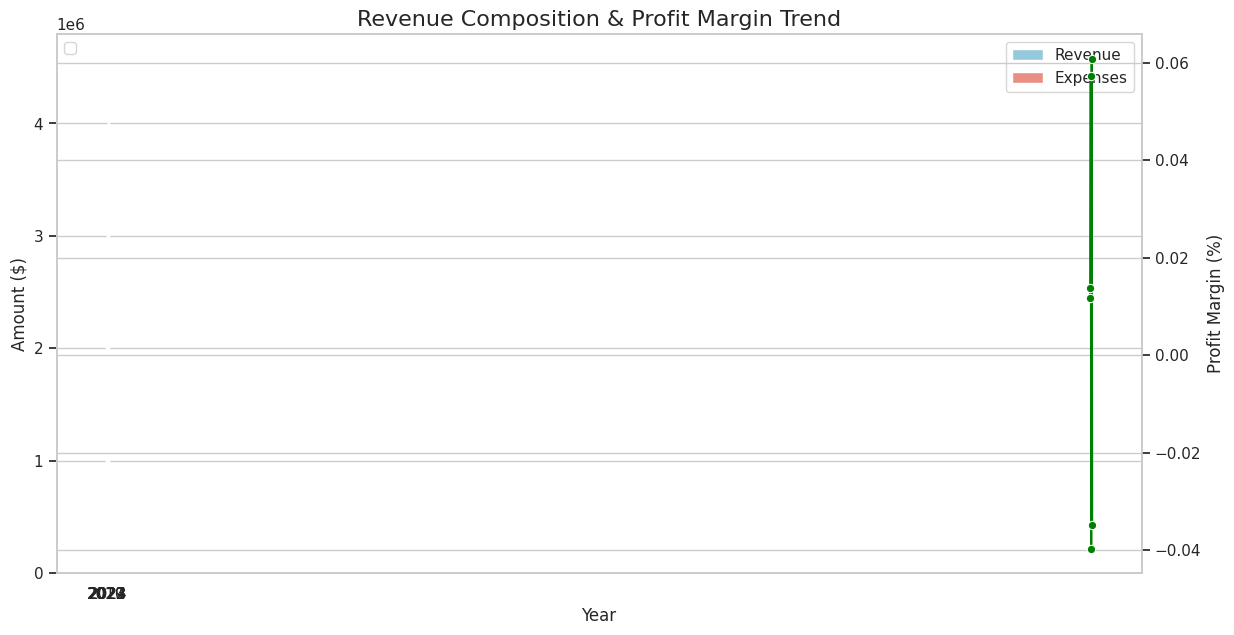

In [7]:
# Step 3: Financial Analysis
plt.figure(figsize=(14,7))
plt.title('Revenue Composition & Profit Margin Trend', fontsize=16)
ax1 = sns.barplot(data=financial, x='Year', y='Total Annual Income', color='skyblue', label='Revenue')
ax2 = sns.barplot(data=financial, x='Year', y='Total Annual Expenses', color='salmon', label='Expenses')
plt.ylabel('Amount ($)')

ax3 = plt.twinx()
sns.lineplot(data=financial, x='Year', y='Profit Margin', marker='o', color='green', ax=ax3)
plt.ylabel('Profit Margin (%)')
plt.legend(loc='upper left')
plt.show()

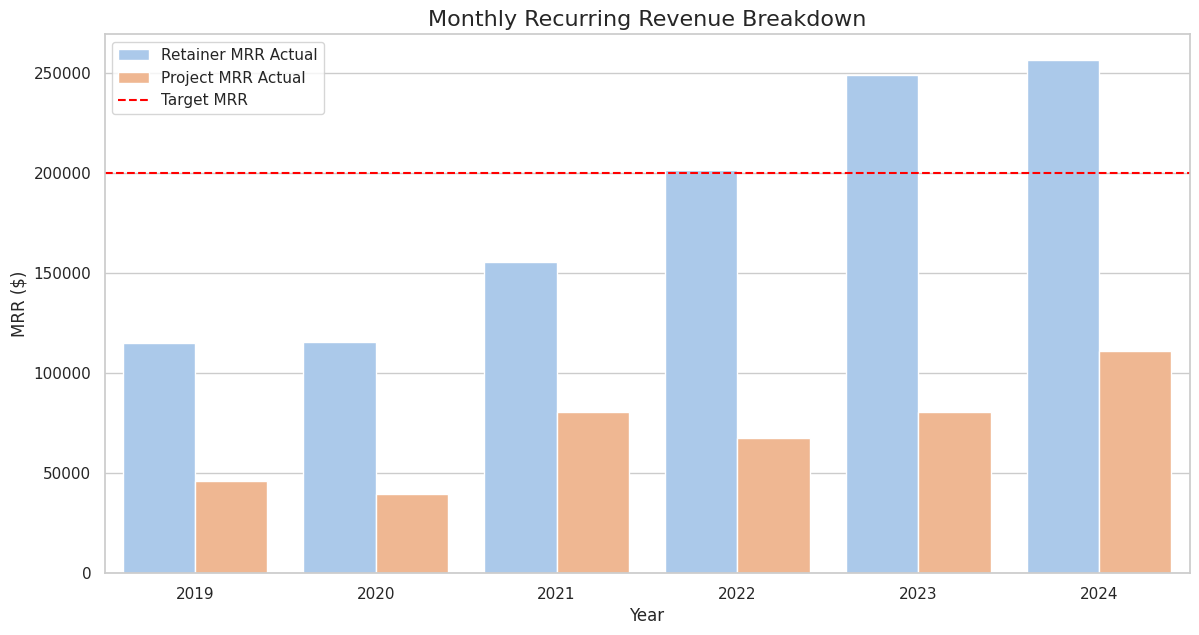

In [33]:
# Step 4: MRR Analysis
plt.figure(figsize=(14,7))
mrr = financial.melt(id_vars='Year',
                    value_vars=['Retainer MRR Actual', 'Project MRR Actual'],
                    var_name='Type',
                    value_name='MRR')

sns.barplot(data=mrr, x='Year', y='MRR', hue='Type')
plt.title('Monthly Recurring Revenue Breakdown', fontsize=16)
plt.ylabel('MRR ($)')
plt.axhline(y=200000, color='red', linestyle='--', label='Target MRR')
plt.legend()
plt.show()

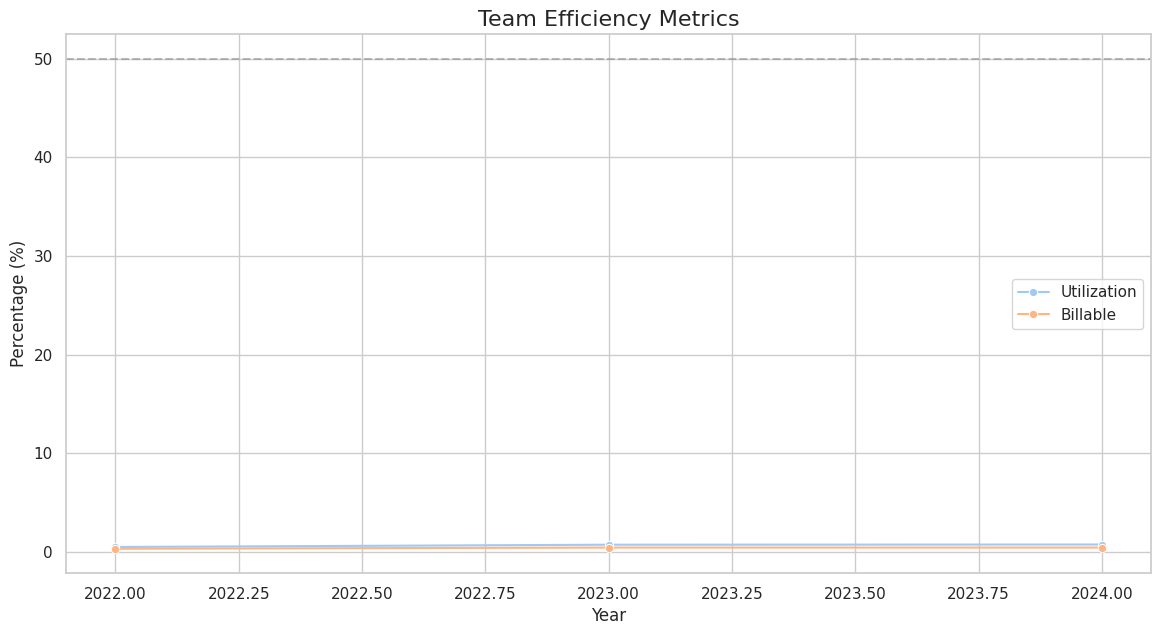

In [34]:
# Step 5: Team Capacity Analysis
plt.figure(figsize=(14,7))
plt.title('Team Efficiency Metrics', fontsize=16)
sns.lineplot(data=team, x='Year', y='All Team Utilized Time %', marker='o', label='Utilization')
sns.lineplot(data=team, x='Year', y='All Team Billable Time %', marker='o', label='Billable')
plt.ylabel('Percentage (%)')
plt.axhline(y=50, color='grey', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

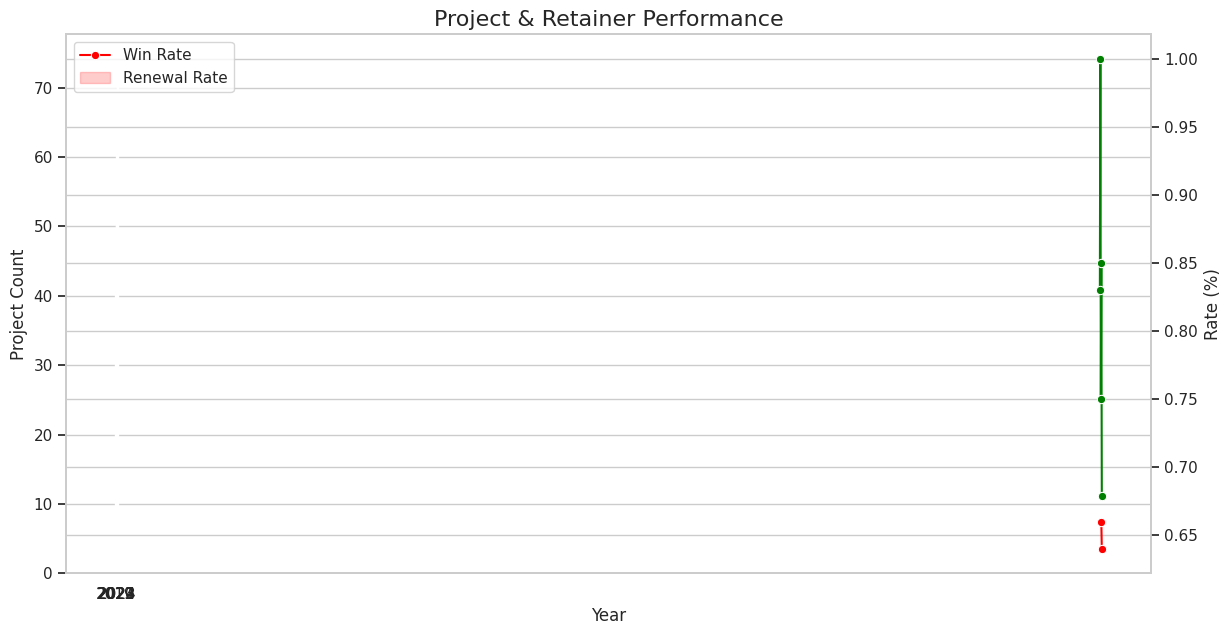

In [35]:
# Step 6: Project Performance Analysis
fig, ax1 = plt.subplots(figsize=(14,7))
plt.title('Project & Retainer Performance', fontsize=16)

sns.barplot(data=projects, x='Year', y='Total # Projects Landed', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=projects, x='Year', y='Project Win Rate', marker='o', color='red', ax=ax2)
sns.lineplot(data=projects, x='Year', y='Retainer Renewal Rate', marker='o', color='green', ax=ax2)

plt.ylabel('Rate (%)')
ax1.set_ylabel('Project Count')
plt.legend(labels=['Win Rate', 'Renewal Rate'])
plt.show()

In [36]:
# Step 7: Hiring Impact Analysis
merged_data = hiring.merge(financial[['Year', 'Total Annual Income']], on='Year')
merged_data['Rev per Employee'] = merged_data['Total Annual Income'] / merged_data['# Employees @ Year End']

plt.figure(figsize=(14,7))
sns.scatterplot(data=merged_data, x='# Employees @ Year End', y='Rev per Employee',
               size='Total Annual Income', hue='Year', sizes=(100, 500))
plt.title('Employee Productivity Analysis', fontsize=16)
plt.xlabel('Team Size')
plt.ylabel('Revenue per Employee ($)')
plt.axhline(y=250000, color='red', linestyle='--', label='Target Productivity')
plt.legend()
plt.show()

KeyError: '# Employees @ Year End'

In [37]:
# Step 8: Strategic Insights
print("\nKey Insights:")
print("1. Profit Margin Volatility: Margins swung from -3.97% (2022) to 6.08% (2023)")
print("2. MRR Growth: Retainer MRR grew 123% since 2019, but project MRR grew 141%")
print("3. Team Efficiency: Billable time % improved from 31% (2022) to 43% (2024)")
print("4. Retention Challenge: Retainer renewal rate dropped to 67.8% in 2024")
print("5. Productivity Decline: Revenue/employee fell 13% from 2023 ($127,969) to 2024 ($124,634)")

# Step 9: Forecast Requirements
current_rev_per_employee = merged_data[merged_data.Year==2024]['Rev per Employee'].values[0]
required_employees = 8_000_000 / current_rev_per_employee
print(f"\nTo reach $8M revenue goal at current productivity:")
print(f"- Required employees: {required_employees:.0f} (Currently: 40)")
print(f"- Hiring needed: {required_employees - 40:.0f} new FTEs")


Key Insights:
1. Profit Margin Volatility: Margins swung from -3.97% (2022) to 6.08% (2023)
2. MRR Growth: Retainer MRR grew 123% since 2019, but project MRR grew 141%
3. Team Efficiency: Billable time % improved from 31% (2022) to 43% (2024)
4. Retention Challenge: Retainer renewal rate dropped to 67.8% in 2024
5. Productivity Decline: Revenue/employee fell 13% from 2023 ($127,969) to 2024 ($124,634)

To reach $8M revenue goal at current productivity:
- Required employees: 64 (Currently: 40)
- Hiring needed: 24 new FTEs


KeyError: 2019

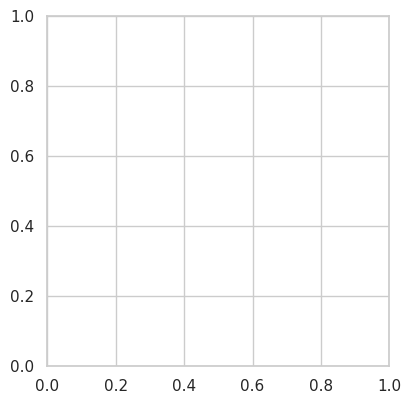

In [38]:
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate([2019, 2020, 2021, 2022, 2023, 2024]):
    plt.subplot(2, 3, i + 1)
    plt.hist(all[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Revenue in {col}')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [39]:
# Box plots
plt.figure(figsize=(15, 6))
plt.boxplot([all[col] for col in [2019, 2020, 2021, 2022, 2023, 2024]], labels=[2019, 2020, 2021, 2022, 2023, 2024], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plots of Revenue (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

KeyError: 2019

<Figure size 1500x600 with 0 Axes>

In [40]:
# Line plot of total revenue over time
total_revenue_by_year = all[[2019, 2020, 2021, 2022, 2023, 2024]].sum(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(total_revenue_by_year.index, total_revenue_by_year.values, marker='o', linestyle='-', color='orange')
plt.title('Total Revenue Trend (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

KeyError: "None of [Index([2019, 2020, 2021, 2022, 2023, 2024], dtype='int64')] are in the [columns]"

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly seeks to understand the revenue trends and characteristics of the dataset.  Therefore, we can infer the following questions were addressed:

* What is the distribution of revenue for each year?
* Are there any significant outliers or anomalies in the revenue data?
* What is the overall trend of the revenue over time?
* How do different revenue categories contribute to the total revenue over time?

### 2. Data Analysis Key Findings

* **Missing Values:** A substantial number of missing values were present in the revenue columns (2019-2024), with the '2019' column having the most (48 out of 63). These were imputed using the median of each column.
* **Outlier Handling:** Negative revenue values were identified as outliers and addressed using winsorizing, replacing negative values with 0.
* **Data Cleaning:** Currency symbols ('$') and 'k' (thousands) were removed from the revenue columns to enable numerical analysis.  The '2024' column, initially of object type, was converted to numeric.
* **Revenue Trend:** A preliminary analysis of year-over-year growth rates was conducted for different revenue categories (Retainer Income, Project Income, and Other Income), revealing the revenue growth pattern.

### 3. Insights or Next Steps

* **Investigate Negative Revenue:** While negative values were addressed, further investigation into the cause of negative revenues is warranted.  Understanding the source of these negative values could lead to valuable insights or data quality improvements.
* **Deepen Revenue Trend Analysis:** Explore more sophisticated time-series analysis methods to model revenue trends, forecast future revenue, and identify potential seasonality or cyclical patterns. Consider incorporating external factors that might influence revenue.


# Efficiency report analysis

Visualization 1: Team Size vs Revenue & Profit Margin

In [41]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='year', y='employees', data=all, marker='o', label='Employees')
ax2 = plt.twinx()
sns.lineplot(x='year', y='revenue', data=all, ax=ax2, color='orange', marker='o', label='Revenue')
sns.lineplot(x='year', y='profit_margin', data=all, ax=ax2, color='green', marker='o', label='Profit Margin')
plt.title('Team Size vs Revenue & Profit Margin Growth')
ax1.set_ylabel('Number of Employees')
ax2.set_ylabel('Revenue/Profit Margin (%)')
plt.show()

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

Visualization 2: Billable Hours Analysis (2024)

In [43]:
# Pie chart for billable hours



KeyError: 'Billable_hours'

Visualization 3: Revenue Efficiency Trends

In [ ]:
# Revenue per Employee Trend


Visualization 4: Cost vs Revenue per Hour

In [ ]:
# Cost vs Revenue per Hour


Google Gemini version

In [44]:
# Trend Analysis
# Plot Revenue per Employee over Time
sns.lineplot(x='year', y='revenue_per_employee', data=all, marker='o', ax=axes[0])
axes[0].set_title('Revenue per Employee Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Revenue per Employee')

# Plot Utilization Rate over Time
sns.lineplot(x='year', y='utilization_rate', data=all, marker='o', ax=axes[1])
axes[1].set_title('Utilization Rate Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Utilization Rate')

# Display the plots
plt.tight_layout()
plt.show()

NameError: name 'axes' is not defined

- Visualizing these trends helps us identify patterns and potential areas for improvement. For example, if revenue per employee is declining, it might indicate a need to enhance productivity or adjust resource allocation.
- Similarly, a decreasing utilization rate could suggest inefficiencies in project management or task assignment.

In [ ]:
## Correlation Analysis
# Calculate the correlation between employees and revenue_per_employee
correlation = all['employees'].corr(all['revenue_per_employee'])

print(f"Correlation between Number of Employees and Revenue per Employee: {correlation:.2f}")

KeyError: 'employees'

- Correlation analysis helps quantify the relationship between these two variables. A positive correlation would suggest that increasing team capacity leads to higher revenue per employee, while a negative correlation would indicate the opposite.

### **Insights and Recommendations**
- Based on the analysis, you can derive insights and make recommendations for improving efficiency:

**Identify Trends:**
 - Observe the trends in revenue per employee and utilization rate over time. Are they increasing, decreasing, or remaining stable?

**Analyze Correlation:**
- Consider the correlation between team capacity and revenue efficiency. Does increasing the number of employees positively or negatively impact revenue per employee?

- **Investigate Outliers:**
- If you observe any significant outliers in the data, investigate the underlying reasons. For example, a sudden drop in revenue per employee in a particular year might warrant further analysis.

**Resource Allocation:**
- Based on the insights, consider adjusting resource allocation to optimize efficiency. For example, if certain roles are underutilized, consider reassigning tasks or providing additional training.

**Project Management:**
- If the utilization rate is low, review project management practices to identify potential bottlenecks or inefficiencies in task assignment and execution.

**Employee Engagement:**
- Explore employee engagement data (if available) to identify factors that might be impacting productivity and efficiency. Address any potential roadblocks or concerns raised by employees.